In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import make_blobs
from joblib import Parallel, delayed
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os
import shutil
from multiprocessing import Pool
import os
import shutil
import multiprocessing
from file_copy import copy_files

In [14]:
df_cnn = pd.read_csv('/Users/daiqiaochu/Desktop/ISE540/project/cnn_docs.csv',header=None)
df_dailymail = pd.read_csv('/Users/daiqiaochu/Desktop/ISE540/project/daily_docs.csv',header=None)
df = pd.concat([df_cnn, df_dailymail], ignore_index=True)

In [3]:
def run_mini_batch_kmeans(X, n_clusters):
    kmeans = MiniBatchKMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    cluster_centers = kmeans.cluster_centers_
    labels, _ = pairwise_distances_argmin_min(X, cluster_centers)
    return labels

In [15]:
n_clusters = 5
n_jobs = -1  # Use all available CPU cores
X=df.iloc[:,1:]

results = Parallel(n_jobs=n_jobs)(
    delayed(run_mini_batch_kmeans)(X, n_clusters) for _ in range(10)
)


In [16]:
df['cluster']=results[0]
df.iloc[:,1:]

,1,2,3,4,5,6,7,8,9,10,...,292,293,294,295,296,297,298,299,300,cluster
0,0.000730,-0.018346,0.008236,0.003144,-0.010496,-0.024600,0.013384,-0.095956,0.007366,0.000891,...,0.013275,-0.016228,-0.020732,0.017171,-0.013564,0.003865,-0.007225,0.002654,0.005953,3
1,-0.000216,-0.015622,0.009654,0.015179,0.008071,-0.009227,0.025422,-0.094464,0.023930,0.014174,...,-0.001425,-0.004470,0.000903,-0.012701,-0.004975,-0.020804,0.000023,0.001397,-0.010049,0
2,0.012945,-0.023032,-0.002196,-0.000939,0.003578,-0.016750,-0.026137,-0.105598,0.005024,-0.009524,...,-0.011017,-0.008097,-0.007004,0.005401,-0.008213,-0.011749,0.013176,0.017984,-0.009935,1
3,-0.008114,-0.018743,0.010188,0.006767,0.000055,-0.019154,-0.006968,-0.093277,0.027855,0.007557,...,0.013139,-0.012825,-0.000731,-0.001439,0.002117,-0.003569,0.005108,-0.012418,-0.004416,2
4,0.005265,-0.014094,0.015859,0.008632,-0.011966,-0.016649,0.009367,-0.093802,0.003673,-0.000634,...,0.000225,0.001301,-0.002960,-0.003357,-0.007089,-0.002765,0.010076,-0.006068,-0.008314,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311966,0.012393,-0.017144,-0.007096,0.003577,-0.007809,-0.021693,-0.010577,-0.107554,0.004502,-0.001138,...,-0.001115,-0.009908,-0.004426,-0.002073,-0.013075,-0.006466,0.002940,0.016747,-0.013812,1
311967,0.000153,-0.019731,0.006967,0.004732,-0.003160,-0.019053,0.006300,-0.104443,0.013189,0.001480,...,0.009428,-0.009252,0.001184,-0.005600,-0.008908,-0.018366,0.006903,-0.014423,-0.006467,0
311968,-0.002933,-0.013476,0.018166,0.019238,-0.002219,-0.015195,0.010300,-0.107203,0.011639,0.011220,...,0.010998,-0.018517,0.002264,-0.009951,-0.002615,0.002322,0.012401,0.001762,-0.010483,0
311969,-0.009901,-0.007435,0.003797,0.012475,0.003529,-0.023513,0.005360,-0.094095,0.022906,-0.003052,...,0.011286,-0.025634,-0.013251,-0.002005,-0.004518,0.014184,0.002806,-0.008627,-0.014740,0


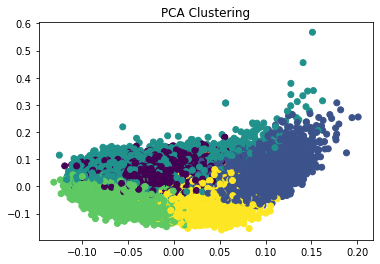

In [17]:
# Assuming 'X' is your text vector dataset
pca = PCA(n_components=2)  # Reduce to 2 dimensions for 2D visualization
reduced_data = pca.fit_transform(df.iloc[:,1:-1])

# Visualize the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df.iloc[:,-1])  # 'labels' are cluster labels
plt.title("PCA Clustering")
plt.show()

In [18]:
final_df=df.iloc[:,[0,-1]]

In [19]:
final_df

,0,cluster
0,638ba1352bdf405a8f5bd681d7fe5c928686afff,3
1,f9f9601180ab3278165d936821e8f145659997f3,0
2,80ec0efb252ec4470aee44482d1e196111b5780b,1
3,8435150be66ea9792999dfc233cc690f9c2fe2d0,2
4,1444cf4d1832507a29a98529c2cd1a41f0154b52,3
...,...,...
311966,f6580fe8313b777ebbe294f83ee1062d1176d5a0,1
311967,d7b4307a8073a1072a47b65c386272b9ec52646f,0
311968,b83c99e6968481320bb248c34fd615281cf03a04,0
311969,fe47a305d107a38cd691066a2aa9a8564aacbc93,0


In [20]:
path_name=[]
for i in final_df.iloc[:,0]:
    path_name.append(i+'.story')

In [22]:
final_df[0]=path_name
final_df[0]

/var/folders/30/_l8lwdk51y7b9tjzyyf34j1w0000gn/T/ipykernel_1939/1780321419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[0]=path_name


0         638ba1352bdf405a8f5bd681d7fe5c928686afff.story
1         f9f9601180ab3278165d936821e8f145659997f3.story
2         80ec0efb252ec4470aee44482d1e196111b5780b.story
3         8435150be66ea9792999dfc233cc690f9c2fe2d0.story
4         1444cf4d1832507a29a98529c2cd1a41f0154b52.story
                               ...                      
311966    f6580fe8313b777ebbe294f83ee1062d1176d5a0.story
311967    d7b4307a8073a1072a47b65c386272b9ec52646f.story
311968    b83c99e6968481320bb248c34fd615281cf03a04.story
311969    fe47a305d107a38cd691066a2aa9a8564aacbc93.story
311970    69c49f15dcc8f314fa083c33c208cd5bf7cc0d66.story
Name: 0, Length: 311971, dtype: object

In [24]:
import os
import shutil
import multiprocessing
import pandas as pd


if __name__ == "__main__":
    num_processes = multiprocessing.cpu_count()
    pool = multiprocessing.Pool(processes=num_processes)

    unique_labels = final_df['cluster'].unique()

    results = [pool.apply_async(copy_files, args=(label, final_df)) for label in unique_labels]

    pool.close()
    pool.join()

    for result in results:
        result.get()
